<a href="https://colab.research.google.com/github/sameersundrani/CS230_FinalProject_Covid19Inaccuracies/blob/main/Final%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>$\textrm{Universidad Nacional de Colombia}$</center>
<center>$\textrm{Facultad de Ciencias}$</center>
<center>$\textrm{Redes Neuronales, Arquitecturas y Aplicaciones}$<center>

<h1><center>$\textrm{Proyecto Final}$</center></h1>
<h2><center>$\textrm{A Deep Learning Approach to Population Level COVID-19 Case Prediction in the US}$</center><h2>

<h3><center>$\textrm{By Sameer Sundrani and Amy Zhang}$</center><h3>

$\textrm{Jerson Felipe Guerrero Espitia}$\
$\textrm{Maestría en Ciencias Económicas}$

# **1. INTRODUCCIÓN** 
Este proyecto fue desarrollado con base en el trabajo realizado por Sameer Sundrani y Amy This Zhang para la calse CS230 de la Universidad de Stanford, California (US) [A Deep Learning Approach to Population Level COVID-19 Case Prediction in the US](http://cs230.stanford.edu/projects_fall_2021/reports/102717926.pdf).

A nivel mundial la pandemia ocasionada por el COVID-19 ha cobrado la vida de casi 7 millones de personas en poco más de 3 años, tan solo en Colombia se han registrado 142.748 muertes a causa de esta enfermedad.  Con el objetivo de frenar la propagación de la enfermedad, durante la primera ola de casos diferentes gobiernos impusieron medidas restrictivas al movimiento. Durante estos periodos de cuarentena obligatoria decreció considerablemente el gasto en viajes y transporte de la población, en Estados Unidos el detrimento en este sector durante el 2020 fue del 42% en comparación con el año anterior. Si bien la restricción en movimiento sugiere una disminución en la propagación del virus, encuestas elaboradas en diferentes territorios y estados de los Estados Unidos muestra que el porcentaje de población que se quedó en casa varió considerablemente en este periodo encontrando tasas desde el 5% hasta el 80%.

# **2. CONJUNTO DE DATOS** 

La información usada para este proyecto proviene de las siguientes fuentes:

*   Trips by Distance - 2.005.832 filas de información que relacionan para cada condado el numero de personas y numero de viajes realizados. 
*   Unemployment and Poverty - 3195 filas de información que relacionan para condado indicadores economicos como: fuerza laboral disponible, numero de personas empleadas, numero de personas desempleadas, tasa de desempleo, ingreso promedio por hogar y población en pobreza.
*   Covid Cases per day per County - Número de casos positivos de COVID 19 reportados por condado.



![](![](https://drive.google.com/uc?export=view&id=1xDrydbSbijvK2JBftUz-5ovagN2B_RWH))

![](https://drive.google.com/uc?export=view&id=1xro4H-5c4MQpT98wRtuenRdNvOy71KRW)

# **3. ARQUITECTURA** 

Se usaron varias acrquitecturas, modificando el numero de capas y el numero de neuronas, con el fin de identificar el modelo que arrojaba el mejor resultado.

Los modelos usados son:

Red Neuronal de 2 capas, 64 neuronas y función ReLu.

Red Neuronal de 3 capas, 64 neuronas y función ReLu

Red Neuronal de 10 capas, 64 neuronas y función ReLu

Red Neuronal de 4 capas, 64-64-32-16 neuronas y función ReLu

Red Neuronal de 6 capas, 32-64-128-64-32-16 neuronas y función ReLu

Red Neuronal de 3 capas, 16-32-16 neuronas y función ReLu

Red Neuronal de 3 capas, 16 neuronas y función ReLu

Red Neuronal de 3 capas, 9 neuronas y función ReLu

Red Neuronal de 2 capas, 16 neuronas y función ReLu

Función de perdida: MAE
Parametros: step-size -> 0.01 y 100 -> epoca



# **4. METRICA** 

Para cada modelo analizado se evaluo el coeficiente correlación de Pearson y el error absoluto medio. 

El coeficiente de correlación de Pearson se usa como metrica de evaluación de correlacion entre los datos predichos y los datos reales.

El erros abosluto medio se usa dada su utilidad en estudios economicos. 

# **4. RESULTADOS** 

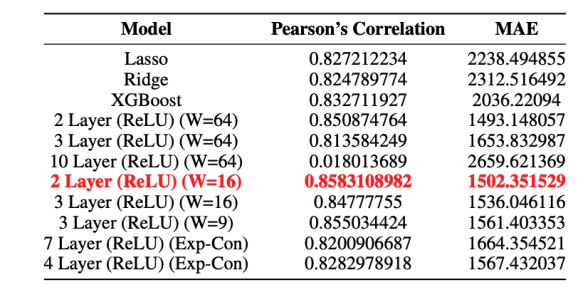

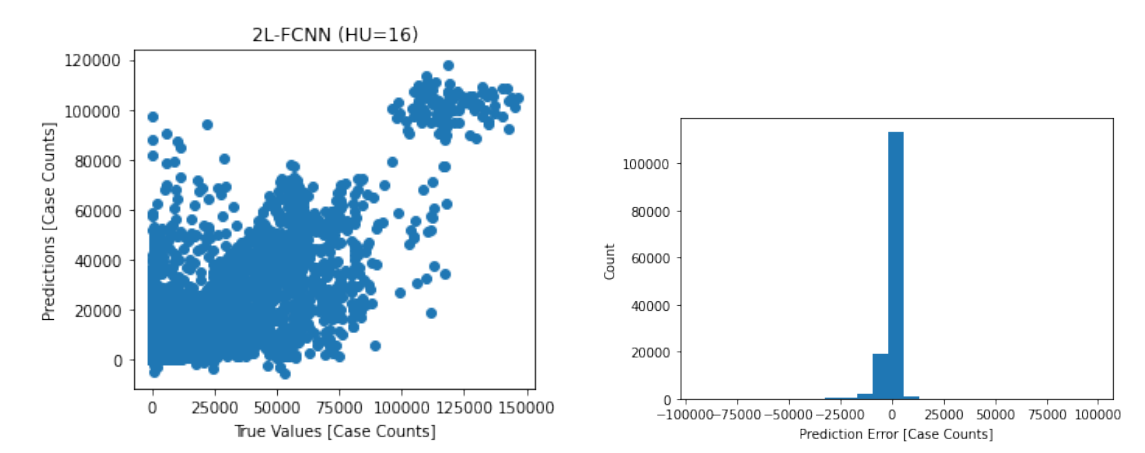

# **6. CONCLUSIONES** 

- Las variables economicas y el indicador de numero de viajes en una región permiten identificar que tan rapido se puede propagar el virus dentro de un territorio.
- Las redes neuronales permiten identificar patrones en la propagación del virus y con ello identificar posibles casos de COVID no reportados.
- Se hace neecsario incluir variables que representen caracteristicas igual de importantes y que influyen en la propagación de una enfermedad, entre ellos: el numero de hospitales, el desarrollo tecnologico, el estado de las instituciones prestadoras de servicios de salud, etc.

In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
#TO DO: IMPORT ALL FILES HERE
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import explained_variance_score, mean_absolute_error #for linear regression evaluation
from sklearn import linear_model
from sklearn import preprocessing
#END TO DO
from google.colab import drive

2.12.0


In [2]:
drive.mount('/content/drive', force_remount=True)
FOLDERNAME = '/content/drive/MyDrive/Colab Notebooks/CS230_FINAL_PROJECT'


Mounted at /content/drive


In [3]:
travel_data_raw = pd.read_csv(FOLDERNAME + "/Trips_by_Distance.csv")
covid_counts_raw = pd.read_csv(FOLDERNAME + "/us-counties.csv")

In [4]:
#travel_data_raw.head()
travel_counties = travel_data_raw.loc[travel_data_raw['Level'] == "County"]
travel_counties_final = travel_counties[['Date', 'State Postal Code', 'County Name', 'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500']]
travel_counties_final['County Name'] = travel_counties_final['County Name'].apply(lambda x: x.split(" ")[0])
travel_counties_final = travel_counties_final.rename(columns={"Date": "date", "State Postal Code": "state", "County Name": "county"})
travel_counties_final.head()

<ipython-input-4-d2c24e945073>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_counties_final['County Name'] = travel_counties_final['County Name'].apply(lambda x: x.split(" ")[0])


,date,state,county,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
52,2020/01/21,NY,Hamilton,18285.0,3025.0,2790.0,1196.0,4534.0,4854.0,1467.0,283.0,38.0,98.0,0.0
53,2020/01/21,NM,Doña,913920.0,218380.0,265268.0,141106.0,132456.0,91822.0,36900.0,20212.0,5245.0,1837.0,694.0
54,2020/01/21,AK,Bristol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2020/01/21,VA,Louisa,147505.0,24957.0,29645.0,19679.0,18592.0,28460.0,19974.0,5247.0,785.0,117.0,49.0
56,2020/01/21,VA,Loudoun,1445859.0,351327.0,332129.0,160314.0,198232.0,268757.0,113140.0,13122.0,5814.0,1395.0,1629.0


In [5]:
covid_counts_final = covid_counts_raw[['date', 'county', 'state', 'cases']]
covid_counts_final['date'] = covid_counts_final['date'].apply(lambda x: x.replace('-', '/'))
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands": "VI",
}
covid_counts_final['state'] = covid_counts_final['state'].apply(lambda x: us_state_to_abbrev[x])
covid_counts_final.head()

<ipython-input-5-9e1ffaf335ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_counts_final['date'] = covid_counts_final['date'].apply(lambda x: x.replace('-', '/'))
<ipython-input-5-9e1ffaf335ab>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_counts_final['state'] = covid_counts_final['state'].apply(lambda x: us_state_to_abbrev[x])


,date,county,state,cases
0,2020/01/21,Snohomish,WA,1
1,2020/01/22,Snohomish,WA,1
2,2020/01/23,Snohomish,WA,1
3,2020/01/24,Cook,IL,1
4,2020/01/24,Snohomish,WA,1


In [6]:
final_data = pd.merge(covid_counts_final, travel_counties_final)
final_data.head()

,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2020/01/21,Snohomish,WA,1,2944078.0,762651.0,726576.0,308236.0,417195.0,540130.0,159563.0,20442.0,4391.0,1152.0,3742.0
1,2020/01/22,Snohomish,WA,1,3006800.0,784271.0,732019.0,311760.0,432308.0,551873.0,165546.0,21241.0,3654.0,1031.0,3097.0
2,2020/01/23,Snohomish,WA,1,2952207.0,782244.0,724152.0,305706.0,405046.0,535931.0,167202.0,22195.0,5095.0,1135.0,3501.0
3,2020/01/24,Cook,IL,1,21307310.0,6266951.0,5185299.0,2574174.0,3260629.0,2988478.0,774147.0,130659.0,86057.0,24356.0,16560.0
4,2020/01/24,Snohomish,WA,1,3167046.0,857787.0,779656.0,334594.0,448890.0,550137.0,160682.0,23484.0,6369.0,1343.0,4104.0


In [7]:
final_data.to_csv(FOLDERNAME+'/final_data.csv')

In [8]:
print("Number of Total Inputs: ", len(final_data))
# print("Confirmed (number should be the same): ",np.sum(final_data.groupby('county').size().to_list()))
print("Number of Total Counties: " ,len(final_data.groupby('county').size().to_list()))

Number of Total Inputs:  791981
Number of Total Counties:  1620


In [9]:
final_data_old = pd.read_csv(FOLDERNAME+'/final_data.csv').iloc[0:, 1:]
final_data_old = final_data_old.dropna()
final_data_old

,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2020/01/21,Snohomish,WA,1,2944078.0,762651.0,726576.0,308236.0,417195.0,540130.0,159563.0,20442.0,4391.0,1152.0,3742.0
1,2020/01/22,Snohomish,WA,1,3006800.0,784271.0,732019.0,311760.0,432308.0,551873.0,165546.0,21241.0,3654.0,1031.0,3097.0
2,2020/01/23,Snohomish,WA,1,2952207.0,782244.0,724152.0,305706.0,405046.0,535931.0,167202.0,22195.0,5095.0,1135.0,3501.0
3,2020/01/24,Cook,IL,1,21307310.0,6266951.0,5185299.0,2574174.0,3260629.0,2988478.0,774147.0,130659.0,86057.0,24356.0,16560.0
4,2020/01/24,Snohomish,WA,1,3167046.0,857787.0,779656.0,334594.0,448890.0,550137.0,160682.0,23484.0,6369.0,1343.0,4104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791976,2020/12/31,Sweetwater,WY,2966,155442.0,42769.0,51380.0,17670.0,12644.0,17677.0,6073.0,3458.0,3316.0,425.0,30.0
791977,2020/12/31,Teton,WY,2138,98648.0,26662.0,21598.0,14716.0,15976.0,12885.0,4352.0,1549.0,572.0,141.0,197.0
791978,2020/12/31,Uinta,WY,1558,79852.0,19802.0,27118.0,10551.0,7357.0,6163.0,4209.0,3587.0,913.0,106.0,46.0
791979,2020/12/31,Washakie,WY,780,29819.0,13642.0,5794.0,3505.0,1639.0,1567.0,2062.0,1283.0,260.0,65.0,2.0


In [10]:
final_data_old.columns

Index(['date', 'county', 'state', 'cases', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500'],
      dtype='object')

In [11]:
#Quick Check for NA/NaN in data
final_data_old.isnull().any()

date                       False
county                     False
state                      False
cases                      False
Number of Trips            False
Number of Trips <1         False
Number of Trips 1-3        False
Number of Trips 3-5        False
Number of Trips 5-10       False
Number of Trips 10-25      False
Number of Trips 25-50      False
Number of Trips 50-100     False
Number of Trips 100-250    False
Number of Trips 250-500    False
Number of Trips >=500      False
dtype: bool

In [12]:
#Check Dates: 
dates_ordered = final_data_old.groupby('date')
dates_ordered.head()

,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2020/01/21,Snohomish,WA,1,2944078.0,762651.0,726576.0,308236.0,417195.0,540130.0,159563.0,20442.0,4391.0,1152.0,3742.0
1,2020/01/22,Snohomish,WA,1,3006800.0,784271.0,732019.0,311760.0,432308.0,551873.0,165546.0,21241.0,3654.0,1031.0,3097.0
2,2020/01/23,Snohomish,WA,1,2952207.0,782244.0,724152.0,305706.0,405046.0,535931.0,167202.0,22195.0,5095.0,1135.0,3501.0
3,2020/01/24,Cook,IL,1,21307310.0,6266951.0,5185299.0,2574174.0,3260629.0,2988478.0,774147.0,130659.0,86057.0,24356.0,16560.0
4,2020/01/24,Snohomish,WA,1,3167046.0,857787.0,779656.0,334594.0,448890.0,550137.0,160682.0,23484.0,6369.0,1343.0,4104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789083,2020/12/31,Autauga,AL,4190,197303.0,43649.0,50455.0,24460.0,28822.0,35085.0,8685.0,3637.0,2060.0,410.0,40.0
789084,2020/12/31,Baldwin,AL,13601,696981.0,127067.0,174473.0,96370.0,128608.0,119501.0,33645.0,9740.0,5520.0,1822.0,235.0
789085,2020/12/31,Barbour,AL,1514,96265.0,20820.0,21854.0,11714.0,16862.0,14545.0,6783.0,2912.0,613.0,149.0,13.0
789086,2020/12/31,Bibb,AL,1834,86984.0,14690.0,19876.0,10083.0,15306.0,14776.0,9459.0,1961.0,741.0,74.0,18.0


In [13]:
print("To Confirm: Number of Total Inputs: (should <= 1609217 (b/c of some previous null values)) ", len(final_data_old))

To Confirm: Number of Total Inputs: (should <= 1609217 (b/c of some previous null values))  790923


In [18]:
unemployment = pd.read_excel(FOLDERNAME+'/Unemployment.xlsx')
unemployment.head()

,FIPS_code,State,Area_name,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,POVALL_2020,POV017_2020
0,0,US,United States,161207103,148183367,13023736,8.078885,67340,NaN,38371394,11204423
1,1000,AL,Alabama,2268309,2121149,147160,6.500000,53958,100.000000,714568,222934
2,1001,AL,"Autauga County, AL",26405,24985,1420,5.400000,67565,125.217762,6242,1912
3,1003,AL,"Baldwin County, AL",98910,92751,6159,6.200000,71135,131.834019,20189,5907
4,1005,AL,"Barbour County, AL",8680,8004,676,7.800000,38866,72.030097,5548,1857


In [19]:
unemployment = unemployment[unemployment["Area_name"].str.contains(",")==True]
unemployment['county'] = unemployment['Area_name'].apply(lambda x: x.split(" County")[0])
final_data = pd.merge(final_data_old, unemployment)
final_data.head()

<ipython-input-19-53ff99ee91d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment['county'] = unemployment['Area_name'].apply(lambda x: x.split(" County")[0])


,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,...,State,Area_name,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,POVALL_2020,POV017_2020
0,2020/01/21,Snohomish,WA,1,2944078.0,762651.0,726576.0,308236.0,417195.0,540130.0,...,WA,"Snohomish County, WA",438858,400158,38700,8.8,93589,116.52162,57832,14515
1,2020/01/22,Snohomish,WA,1,3006800.0,784271.0,732019.0,311760.0,432308.0,551873.0,...,WA,"Snohomish County, WA",438858,400158,38700,8.8,93589,116.52162,57832,14515
2,2020/01/23,Snohomish,WA,1,2952207.0,782244.0,724152.0,305706.0,405046.0,535931.0,...,WA,"Snohomish County, WA",438858,400158,38700,8.8,93589,116.52162,57832,14515
3,2020/01/24,Snohomish,WA,1,3167046.0,857787.0,779656.0,334594.0,448890.0,550137.0,...,WA,"Snohomish County, WA",438858,400158,38700,8.8,93589,116.52162,57832,14515
4,2020/01/25,Snohomish,WA,1,2889757.0,746396.0,753479.0,316316.0,428858.0,454511.0,...,WA,"Snohomish County, WA",438858,400158,38700,8.8,93589,116.52162,57832,14515


In [20]:
final_data = final_data.drop(['State', 'Area_name'], axis=1)
final_data = final_data.dropna()
final_data

,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,...,Number of Trips >=500,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,POVALL_2020,POV017_2020
0,2020/01/21,Snohomish,WA,1,2944078.0,762651.0,726576.0,308236.0,417195.0,540130.0,...,3742.0,53061,438858,400158,38700,8.8,93589,116.521620,57832,14515
1,2020/01/22,Snohomish,WA,1,3006800.0,784271.0,732019.0,311760.0,432308.0,551873.0,...,3097.0,53061,438858,400158,38700,8.8,93589,116.521620,57832,14515
2,2020/01/23,Snohomish,WA,1,2952207.0,782244.0,724152.0,305706.0,405046.0,535931.0,...,3501.0,53061,438858,400158,38700,8.8,93589,116.521620,57832,14515
3,2020/01/24,Snohomish,WA,1,3167046.0,857787.0,779656.0,334594.0,448890.0,550137.0,...,4104.0,53061,438858,400158,38700,8.8,93589,116.521620,57832,14515
4,2020/01/25,Snohomish,WA,1,2889757.0,746396.0,753479.0,316316.0,428858.0,454511.0,...,3477.0,53061,438858,400158,38700,8.8,93589,116.521620,57832,14515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994100,2020/12/27,Loving,TX,1,438.0,65.0,74.0,25.0,40.0,136.0,...,0.0,48301,295,290,5,1.7,97491,147.606286,7,6
3994101,2020/12/28,Loving,TX,1,557.0,93.0,121.0,61.0,46.0,123.0,...,1.0,48301,295,290,5,1.7,97491,147.606286,7,6
3994102,2020/12/29,Loving,TX,1,526.0,135.0,82.0,29.0,63.0,107.0,...,1.0,48301,295,290,5,1.7,97491,147.606286,7,6
3994103,2020/12/30,Loving,TX,1,599.0,138.0,130.0,44.0,68.0,78.0,...,1.0,48301,295,290,5,1.7,97491,147.606286,7,6


In [21]:
# normalize travel data portion of final_data to have zero mean and unit variance to optimize learning
scaler = preprocessing.StandardScaler().fit(final_data.iloc[:, 4:])
final_data.iloc[:, 4:] =  scaler.transform(final_data.iloc[:, 4:])
final_data.head()

,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,...,Number of Trips >=500,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,POVALL_2020,POV017_2020
0,2020/01/21,Snohomish,WA,1,3.801412,3.633462,3.800397,3.240439,3.483537,4.775140,...,2.933304,1.605349,3.33765,3.340895,3.157915,1.02465,2.725606,1.335256,1.593281,1.210918
1,2020/01/22,Snohomish,WA,1,3.890954,3.746678,3.831883,3.282066,3.624094,4.887820,...,2.386524,1.605349,3.33765,3.340895,3.157915,1.02465,2.725606,1.335256,1.593281,1.210918
2,2020/01/23,Snohomish,WA,1,3.813017,3.736064,3.786375,3.210554,3.370547,4.734848,...,2.729003,1.605349,3.33765,3.340895,3.157915,1.02465,2.725606,1.335256,1.593281,1.210918
3,2020/01/24,Snohomish,WA,1,4.119721,4.131657,4.107446,3.551790,3.778313,4.871162,...,3.240178,1.605349,3.33765,3.340895,3.157915,1.02465,2.725606,1.335256,1.593281,1.210918
4,2020/01/25,Snohomish,WA,1,3.723863,3.548340,3.956021,3.335883,3.592008,3.953578,...,2.708658,1.605349,3.33765,3.340895,3.157915,1.02465,2.725606,1.335256,1.593281,1.210918


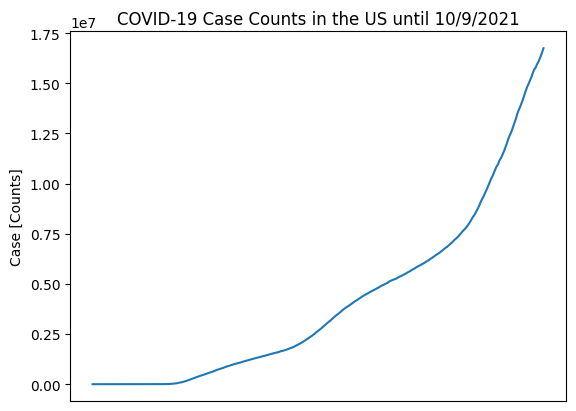

In [22]:
# See cases over the entire dataset, grouped by day
cases = dates_ordered[['date', 'cases']].sum('cases')
frame1 = plt.gca()
plt.plot(cases)
plt.ylabel('Case [Counts]')
frame1.axes.get_xaxis().set_visible(False)
plt.title('COVID-19 Case Counts in the US until 10/9/2021')
plt.savefig(FOLDERNAME+'case_counts', bbox_inches='tight')
# dates_ordered[['date', 'cases']].sum('cases').plot(title='Cases over Time', ylabel='Log Cases')

# Segmentación de la información para uso Train/Test por State (https://www.nytimes.com/interactive/2020/us/coronavirus-testing.html)

In [25]:
#final_data.head()
state_split_all_data = final_data[['state', 'cases', 'Number of Trips <1',	'Number of Trips 1-3',	'Number of Trips 3-5',	'Number of Trips 5-10',	'Number of Trips 10-25',	'Number of Trips 25-50',	'Number of Trips 50-100',	'Number of Trips 100-250', 'Number of Trips 250-500',	'Number of Trips >=500', 'Civilian_labor_force_2020',	'Employed_2020',	'Unemployed_2020',	'Unemployment_rate_2020',	'Median_Household_Income_2020',	'Med_HH_Income_Percent_of_State_Total_2020',	'POVALL_2020',	'POV017_2020']].copy()
#First, we normalize using sklearn's MinMaxScaler()
#x2 = X2.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#state_split_all_data[['Number of Trips <1',	'Number of Trips 1-3',	'Number of Trips 3-5',	'Number of Trips 5-10',	'Number of Trips 10-25',	'Number of Trips 25-50',	'Number of Trips 50-100',	'Number of Trips 100-250', 'Number of Trips 250-500',	'Number of Trips >=500']] = min_max_scaler.fit_transform(state_split_all_data[['Number of Trips <1',	'Number of Trips 1-3',	'Number of Trips 3-5',	'Number of Trips 5-10',	'Number of Trips 10-25',	'Number of Trips 25-50',	'Number of Trips 50-100',	'Number of Trips 100-250', 'Number of Trips 250-500',	'Number of Trips >=500']])
state_split_all_data_normalized = state_split_all_data.sample(frac=1) #shuffle everything

X2 = state_split_all_data_normalized[['state', 'Number of Trips <1',	'Number of Trips 1-3',	'Number of Trips 3-5',	'Number of Trips 5-10',	'Number of Trips 10-25',	'Number of Trips 25-50',	'Number of Trips 50-100',	'Number of Trips 100-250', 'Number of Trips 250-500',	'Number of Trips >=500', 'Civilian_labor_force_2020',	'Employed_2020',	'Unemployed_2020',	'Unemployment_rate_2020',	'Median_Household_Income_2020',	'Med_HH_Income_Percent_of_State_Total_2020',	'POVALL_2020',	'POV017_2020']]
y2 = state_split_all_data_normalized['cases']


In [26]:
X_train2 = X2[X2['state'].isin(['VT', 'ME', 'NY', 'RI', 'MA', 'NH', 'CT', 'HI', 'MI', 'WA', 'MD', 'NJ', 'CA', 'DE', 'VA', 'CO', 'FL', 'IL', 'NC', 'LA', 'NM', 'WV', 'OR', 'SC', 'AK', 'GA', 'OH', 'AR', 'PA', 'MN', 'IN', 'NV', 'NE', 'UT', 'OK', 'KY', 'MS', 'AZ', 'MO', 'TN', 'TX'])]
X_train2 = X_train2.iloc[:, 1:]
y_train2 = y2[X2['state'].isin(['VT', 'ME', 'NY', 'RI', 'MA', 'NH', 'CT', 'HI', 'MI', 'WA', 'MD', 'NJ', 'CA', 'DE', 'VA', 'CO', 'FL', 'IL', 'NC', 'LA', 'NM', 'WV', 'OR', 'SC', 'AK', 'GA', 'OH', 'AR', 'PA', 'MN', 'IN', 'NV', 'NE', 'UT', 'OK', 'KY', 'MS', 'AZ', 'MO', 'TN', 'TX'])]

X_val_test2 = X2[X2['state'].isin(['SD', 'IA', 'WY', 'ID', 'KS', 'AL', 'MT', 'WI'])]
X_val_test2 = X_val_test2.iloc[:, 1:]
y_val_test2 = y2[X2['state'].isin(['SD', 'IA', 'WY', 'ID', 'KS', 'AL', 'MT', 'WI'])]

X_val_states, X_test_states, y_val_states, y_test_states = train_test_split(X_val_test2, y_val_test2, test_size=0.50, random_state=1)
X_train2.head()

,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,POVALL_2020,POV017_2020
1211496,-0.255842,-0.290149,-0.328460,-0.318844,-0.257391,-0.271709,-0.454966,-0.296601,-0.329697,-0.233777,-0.209507,-0.210210,-0.193421,-0.156515,0.387402,0.576254,-0.236916,-0.222542
1353125,-0.353956,-0.368103,-0.390759,-0.393684,-0.400068,-0.457826,-0.462672,-0.380536,-0.370797,-0.238863,2.036804,2.016326,2.143105,1.402623,1.953799,0.228272,1.346672,1.296999
1252097,0.738690,0.694074,0.837647,0.895694,0.791834,0.841413,0.153134,0.054195,-0.005943,2.028787,0.708851,0.719284,0.576975,0.504937,1.480696,0.234644,0.380263,0.227929
4886,4.881527,5.993271,5.223419,4.592758,4.662641,3.052049,3.718981,3.039534,2.830690,3.057071,-0.306566,-0.313980,-0.221623,2.158568,-0.358653,-0.295161,-0.271674,-0.243027
1578973,-0.261712,-0.205370,-0.281530,-0.225105,-0.160236,-0.159460,-0.221413,-0.091845,-0.195581,-0.127812,-0.137995,-0.145836,-0.056442,1.497116,-0.335202,-1.481748,-0.014851,-0.013440


In [27]:
print("Train Set Dimensions : ", X_train2.shape)
print("Train Labels Dimensions : ", y_train2.shape)
print("Val Set Dimensions : ", X_val_states.shape)
print("Val Labels Dimensions : ", y_val_states.shape)
print("Test Set Dimensions : ", X_test_states.shape)
print("Test Labels Dimensions : ", y_test_states.shape)

Train Set Dimensions :  (3271546, 18)
Train Labels Dimensions :  (3271546,)
Val Set Dimensions :  (344840, 18)
Val Labels Dimensions :  (344840,)
Test Set Dimensions :  (344840, 18)
Test Labels Dimensions :  (344840,)


# Modeling

## Lasso Regression

In [28]:
print("STARTING MODEL FITTING")
start=time.time()
reg_lasso = linear_model.LassoCV(random_state=1, max_iter=100000).fit(X_train2.iloc[:, 1:], y_train2)
stop=time.time()
print("MODEL FITTING FINISHED -- Total Time = ", stop-start, ' ms')


STARTING MODEL FITTING
MODEL FITTING FINISHED -- Total Time =  189.38139009475708  ms


In [29]:
y_pred_states_lasso = reg_lasso.predict(X_val_states.iloc[:, 1:])
#exp_var_score = explained_variance_score(y_val_states, y_pred_states)
corr_lasso, _ = pearsonr(y_val_states, y_pred_states_lasso)
print("Pearson Correlation Coefficient = ", corr_lasso) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_pred_states_lasso, y_val_states))
print(reg_lasso.coef_)
print(reg_lasso.intercept_)


Pearson Correlation Coefficient =  0.6672723708776658
Mean Abolsute Error =  1000.8607697873374
[-3317.31906856  4839.30489201   567.24196518  1320.08451799
   109.96205493   697.95665789  -151.27845202   703.67454133
  -478.30084961     0.            10.75320533   -86.29479163
   -27.92386354   -49.68904636     0.           253.22531068
     0.        ]
1552.5593477683851


Text(0, 0.5, 'Predicted')

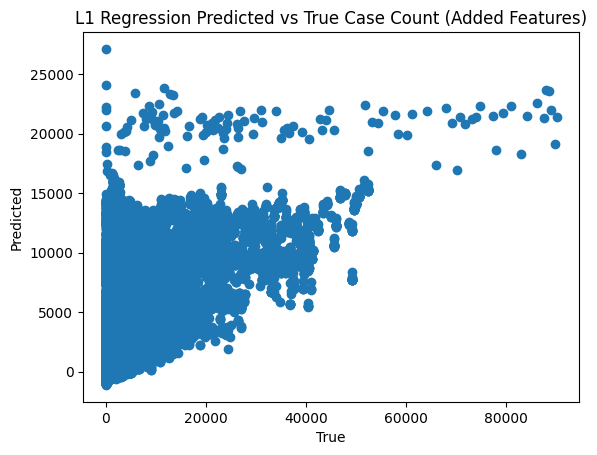

In [30]:
plt.scatter(y_val_states, y_pred_states_lasso) #Should be a straight line
plt.title('L1 Regression Predicted vs True Case Count (Added Features)')
plt.xlabel('True')
plt.ylabel('Predicted')

## Ridge Regression

In [31]:
print("STARTING MODEL FITTING")
start=time.time()
reg_ridge = linear_model.RidgeCV().fit(X_train2.iloc[:, 1:], y_train2)
stop=time.time()
print("MODEL FITTING FINISHED -- Total Time = ", stop-start, ' ms')

STARTING MODEL FITTING
MODEL FITTING FINISHED -- Total Time =  5.744891166687012  ms


In [32]:
y_pred_states_ridge = reg_ridge.predict(X_val_states.iloc[:, 1:])
#exp_var_score = explained_variance_score(y_val_states, y_pred_states)
corr_ridge, _ = pearsonr(y_val_states, y_pred_states_ridge)
print("Pearson Correlation Coefficient = ", corr_ridge) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_pred_states_ridge, y_val_states))
print(reg_ridge.coef_)
print(reg_ridge.intercept_)

Pearson Correlation Coefficient =  0.667524971777311
Mean Abolsute Error =  1018.5728734264774
[-4.62012168e+03  6.23663205e+03  3.73821202e+02  1.45413968e+03
  1.34459825e+02  7.14335576e+02 -2.78419306e+02  7.76881172e+02
 -5.06211370e+02 -1.43055143e+00  2.58001811e+01 -2.63249768e+02
 -2.60352690e+01 -5.32475500e+01  5.13274959e+00  7.53154244e+02
 -3.42258329e+02]
1550.4648327413406


Text(0, 0.5, 'Predicted')

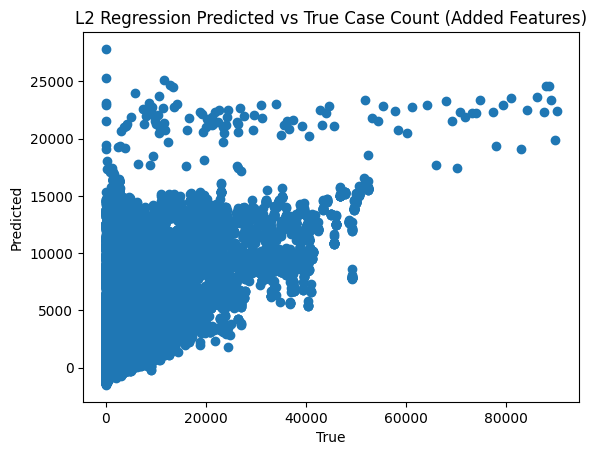

In [33]:
plt.scatter(y_val_states, y_pred_states_ridge) #Should be a straight line
plt.title('L2 Regression Predicted vs True Case Count (Added Features)')
plt.xlabel('True')
plt.ylabel('Predicted')

##Red Neuronal de 2 capas, 64 neuronas y función ReLu

In [35]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [36]:
normalizer.adapt(np.array(X_train2)) 

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(False)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

In [ ]:
dnn_model1 = build_and_compile_model(normalizer)
dnn_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 17)               35        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                1152      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,412
Trainable params: 5,377
Non-trainable params: 35
_________________________________________________________________


In [ ]:
%%time
history = dnn_model1.fit(
    Xtrain2_tf,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
31833/31833 [==============================] - 57s 2ms/step - loss: 3821.0046 - val_loss: 3692.2078
Epoch 2/100
31833/31833 [==============================] - 60s 2ms/step - loss: 3508.9600 - val_loss: 3396.5422
Epoch 3/100
31833/31833 [==============================] - 59s 2ms/step - loss: 3386.2632 - val_loss: 3305.8989
Epoch 4/100
31833/31833 [==============================] - 61s 2ms/step - loss: 3312.5479 - val_loss: 3183.9609
Epoch 5/100
31833/31833 [==============================] - 58s 2ms/step - loss: 3258.3513 - val_loss: 3262.1873
Epoch 6/100
31833/31833 [==============================] - 58s 2ms/step - loss: 3211.5334 - val_loss: 3149.9958
Epoch 7/100
31833/31833 [==============================] - 59s 2ms/step - loss: 3170.2717 - val_loss: 3177.8291
Epoch 8/100
31833/31833 [==============================] - 60s 2ms/step - loss: 3125.9902 - val_loss: 3096.8772
Epoch 9/100
31833/31833 [==============================] - 62s 2ms/step - loss: 3092.6230 - val_loss: 30

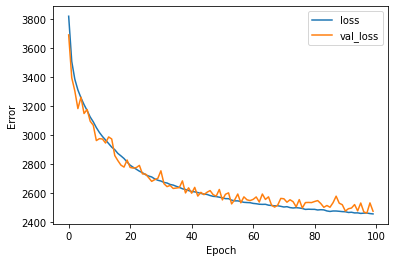

In [ ]:
plot_loss(history)

In [ ]:
test_results = dnn_model1.evaluate(X_val_states.iloc[:, 1:], y_val_states, verbose=0)

In [ ]:
test_results

1493.147216796875

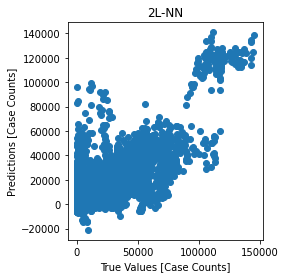

In [ ]:
val_predictions_nnmodel1 = dnn_model1.predict(X_val_states.iloc[:, 1:]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel1)
plt.title('2L-NN')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nn2, _ = pearsonr(y_val_states, val_predictions_nnmodel1)
print("Pearson Correlation Coefficient = ", corr_nn2) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel1))


Pearson Correlation Coefficient =  0.8508747639044546
Mean Abolsute Error =  1493.1480565248035


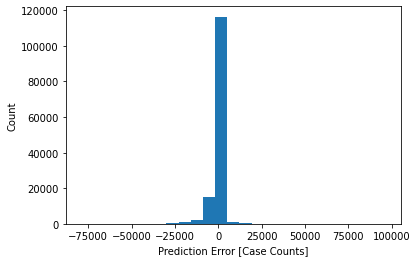

In [ ]:
error = val_predictions_nnmodel1 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model1.save('dnn_model1')

INFO:tensorflow:Assets written to: dnn_model1/assets


## Red Neuronal de 3 capas, 64 neuronas y función ReLu

In [ ]:
def build_and_compile_model2(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

In [ ]:
dnn_model2 = build_and_compile_model2(normalizer)
dnn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 17)               35        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                1152      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,572
Trainable params: 9,537
Non-trainable params: 35
___________________________________________________

In [ ]:
%%time
history2 = dnn_model2.fit(
    Xtrain2_tf,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
31833/31833 [==============================] - 74s 2ms/step - loss: 3727.5515 - val_loss: 3372.2725
Epoch 2/100
31833/31833 [==============================] - 74s 2ms/step - loss: 3381.3850 - val_loss: 3321.1001
Epoch 3/100
31833/31833 [==============================] - 78s 2ms/step - loss: 3222.9709 - val_loss: 3057.2896
Epoch 4/100
31833/31833 [==============================] - 76s 2ms/step - loss: 3114.5989 - val_loss: 2967.3032
Epoch 5/100
31833/31833 [==============================] - 75s 2ms/step - loss: 3022.8230 - val_loss: 3091.2961
Epoch 6/100
31833/31833 [==============================] - 73s 2ms/step - loss: 2945.7124 - val_loss: 2941.2681
Epoch 7/100
31833/31833 [==============================] - 72s 2ms/step - loss: 2874.7502 - val_loss: 2825.3032
Epoch 8/100
31833/31833 [==============================] - 71s 2ms/step - loss: 2817.1851 - val_loss: 2786.9673
Epoch 9/100
31833/31833 [==============================] - 74s 2ms/step - loss: 2777.1206 - val_loss: 27

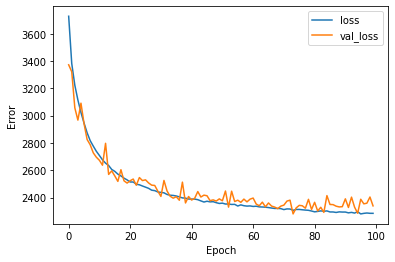

In [ ]:
plot_loss(history2)

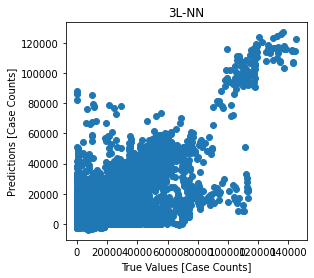

In [ ]:
val_predictions_nnmodel2 = dnn_model2.predict(X_val_states.iloc[:, 1:]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel2)
plt.title('3L-NN')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nn3, _ = pearsonr(y_val_states, val_predictions_nnmodel2)
print("Pearson Correlation Coefficient = ", corr_nn3) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel2))

Pearson Correlation Coefficient =  0.8135842492497687
Mean Abolsute Error =  1653.832987318188


In [ ]:
dnn_model2.save('dnn_model2')

INFO:tensorflow:Assets written to: dnn_model2/assets


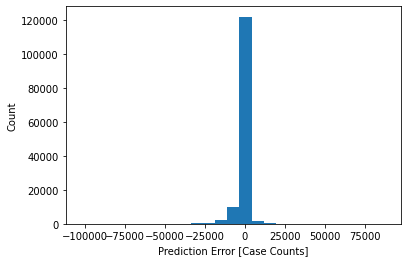

In [ ]:
error = val_predictions_nnmodel2 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

## Red Neuronal de 10 capas, 64 neuronas y función ReLu

In [ ]:
def build_and_compile_model3(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

In [ ]:
dnn_model3 = build_and_compile_model3(normalizer)
dnn_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 17)               35        
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 64)                1152      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                      

In [ ]:
%%time
history3 = dnn_model3.fit(
    Xtrain2_tf,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
31833/31833 [==============================] - 92s 3ms/step - loss: 3863.0164 - val_loss: 3801.4731
Epoch 2/100
31833/31833 [==============================] - 92s 3ms/step - loss: 3539.7375 - val_loss: 4116.6479
Epoch 3/100
31833/31833 [==============================] - 91s 3ms/step - loss: 3461.9692 - val_loss: 3579.1125
Epoch 4/100
31833/31833 [==============================] - 89s 3ms/step - loss: 3387.0110 - val_loss: 3206.4932
Epoch 5/100
31833/31833 [==============================] - 95s 3ms/step - loss: 3307.6885 - val_loss: 3196.8354
Epoch 6/100
31833/31833 [==============================] - 88s 3ms/step - loss: 3288.5376 - val_loss: 3266.0664
Epoch 7/100
31833/31833 [==============================] - 91s 3ms/step - loss: 3217.6843 - val_loss: 3067.6250
Epoch 8/100
31833/31833 [==============================] - 91s 3ms/step - loss: 3240.5461 - val_loss: 3251.3982
Epoch 9/100
31833/31833 [==============================] - 91s 3ms/step - loss: 3211.8689 - val_loss: 31

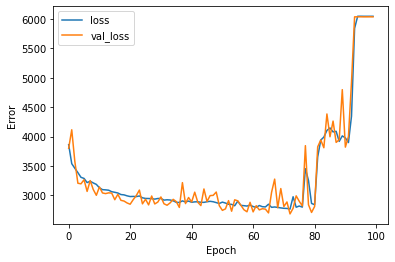

In [ ]:
plot_loss(history3)

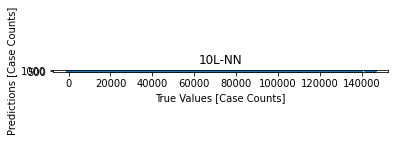

In [ ]:
val_predictions_nnmodel3 = dnn_model3.predict(X_val_states.iloc[:, 1:]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel3)
plt.title('10L-NN')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nn10, _ = pearsonr(y_val_states, val_predictions_nnmodel3)
print("Pearson Correlation Coefficient = ", corr_nn10) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel3))

Pearson Correlation Coefficient =  0.018013689030761164
Mean Abolsute Error =  2659.621369107628


In [ ]:
dnn_model3.save('dnn_model3')

INFO:tensorflow:Assets written to: dnn_model3/assets


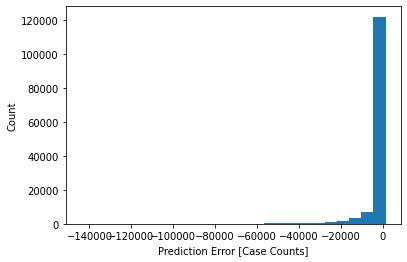

In [ ]:
error = val_predictions_nnmodel3 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

## Red Neuronal de 4 capas, 64-64-32-16 neuronas y función ReLu

In [ ]:
def build_and_compile_model4(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

dnn_model4 = build_and_compile_model4(normalizer)
dnn_model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 17)               35        
 ion)                                                            
                                                                 
 dense_21 (Dense)            (None, 64)                1152      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                      

In [ ]:
%%time
history4 = dnn_model4.fit(
    Xtrain2_tf,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
31833/31833 [==============================] - 66s 2ms/step - loss: 3705.5608 - val_loss: 3556.0522
Epoch 2/100
31833/31833 [==============================] - 68s 2ms/step - loss: 3394.6555 - val_loss: 3384.8042
Epoch 3/100
31833/31833 [==============================] - 65s 2ms/step - loss: 3263.9756 - val_loss: 3102.9202
Epoch 4/100
31833/31833 [==============================] - 65s 2ms/step - loss: 3164.8064 - val_loss: 3172.8347
Epoch 5/100
31833/31833 [==============================] - 65s 2ms/step - loss: 3084.5503 - val_loss: 3163.1716
Epoch 6/100
31833/31833 [==============================] - 67s 2ms/step - loss: 3013.3491 - val_loss: 3175.6848
Epoch 7/100
31833/31833 [==============================] - 65s 2ms/step - loss: 2945.3442 - val_loss: 2808.9866
Epoch 8/100
31833/31833 [==============================] - 65s 2ms/step - loss: 2901.0125 - val_loss: 2851.7979
Epoch 9/100
31833/31833 [==============================] - 64s 2ms/step - loss: 2854.4282 - val_loss: 27

KeyboardInterrupt: ignored

In [ ]:
plot_loss(history4)

In [ ]:
val_predictions_nnmodel4 = dnn_model4.predict(X_val_states.iloc[:, 1:]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel3)
plt.title('4L-NN')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nnCustom, _ = pearsonr(y_val_states, val_predictions_nnmodel4)
print("Pearson Correlation Coefficient = ", corr_nnCustom) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel4))

In [ ]:
dnn_model4.save('dnn_model4')

In [ ]:
error = val_predictions_nnmodel4 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

## Red Neuronal de 6 capas, 32-64-128-64-32-16 neuronas y función ReLu 

In [ ]:
def build_and_compile_model5(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

dnn_model5 = build_and_compile_model5(normalizer)
dnn_model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                        

In [ ]:
%%time
history5 = dnn_model5.fit(
    Xtrain2_tf,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
31833/31833 [==============================] - 87s 3ms/step - loss: 3720.6753 - val_loss: 3637.6809
Epoch 2/100
31833/31833 [==============================] - 85s 3ms/step - loss: 3434.2812 - val_loss: 3732.9109
Epoch 3/100
31833/31833 [==============================] - 85s 3ms/step - loss: 3300.4546 - val_loss: 3243.8340
Epoch 4/100
31833/31833 [==============================] - 85s 3ms/step - loss: 3215.4602 - val_loss: 3180.4875
Epoch 5/100
31833/31833 [==============================] - 85s 3ms/step - loss: 3152.2712 - val_loss: 3069.4368
Epoch 6/100
31833/31833 [==============================] - 85s 3ms/step - loss: 3098.0103 - val_loss: 3053.2590
Epoch 7/100
31833/31833 [==============================] - 84s 3ms/step - loss: 3056.5415 - val_loss: 2988.0935
Epoch 8/100
31833/31833 [==============================] - 84s 3ms/step - loss: 3007.4497 - val_loss: 2974.3733
Epoch 9/100
31833/31833 [==============================] - 84s 3ms/step - loss: 2988.9468 - val_loss: 28

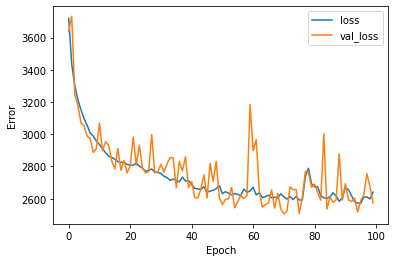

In [ ]:
plot_loss(history5)

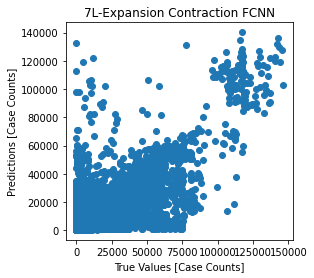

In [ ]:
val_predictions_nnmodel5 = dnn_model5.predict(X_val_states.iloc[:, 1:]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel5)
plt.title('7L-Expansion Contraction FCNN')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nnCustom, _ = pearsonr(y_val_states, val_predictions_nnmodel5)
print("Pearson Correlation Coefficient = ", corr_nnCustom) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel5))

Pearson Correlation Coefficient =  0.8200906686921089
Mean Abolsute Error =  1664.354521398934


In [ ]:
dnn_model5.save(FOLDERNAME+'/modelFCNN7Layers')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS230_FINAL_PROJECT/modelFCNN7Layers/assets


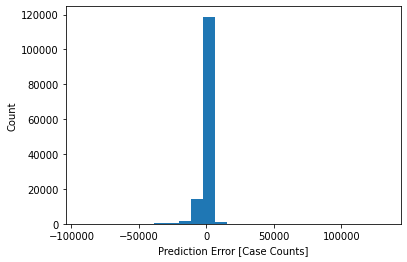

In [ ]:
error = val_predictions_nnmodel5 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

## Red Neuronal de 3 capas, 16-32-16 neuronas y función ReLu

In [ ]:
def build_and_compile_model8(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

dnn_model8 = build_and_compile_model8(normalizer)
dnn_model8.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense_19 (Dense)            (None, 16)                288       
                                                                 
 dense_20 (Dense)            (None, 32)                544       
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,412
Trainable params: 1,377
Non-trainable params: 35
___________________________________________________

In [ ]:
%%time
history8 = dnn_model8.fit(
    Xtrain2_tf,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
31833/31833 [==============================] - 75s 2ms/step - loss: 3787.5286 - val_loss: 3579.7141
Epoch 2/100
31833/31833 [==============================] - 74s 2ms/step - loss: 3545.6270 - val_loss: 3401.8228
Epoch 3/100
31833/31833 [==============================] - 75s 2ms/step - loss: 3427.2146 - val_loss: 3400.7676
Epoch 4/100
31833/31833 [==============================] - 75s 2ms/step - loss: 3350.6196 - val_loss: 3238.3743
Epoch 5/100
31833/31833 [==============================] - 75s 2ms/step - loss: 3280.3918 - val_loss: 3229.2141
Epoch 6/100
31833/31833 [==============================] - 74s 2ms/step - loss: 3236.9097 - val_loss: 3349.2214
Epoch 7/100
31833/31833 [==============================] - 75s 2ms/step - loss: 3192.6824 - val_loss: 3124.7263
Epoch 8/100
31833/31833 [==============================] - 74s 2ms/step - loss: 3154.9409 - val_loss: 3101.0232
Epoch 9/100
31833/31833 [==============================] - 75s 2ms/step - loss: 3124.8010 - val_loss: 31

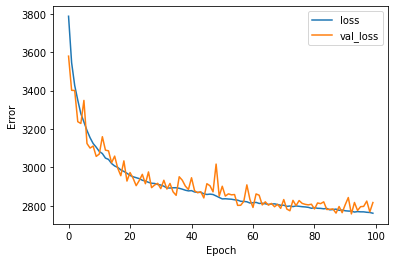

In [ ]:
plot_loss(history8)

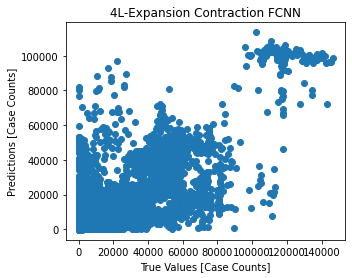

In [ ]:
val_predictions_nnmodel8 = dnn_model8.predict(X_val_states.iloc[:, 1:]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel8)
plt.title('4L-Expansion Contraction FCNN')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nnCustom, _ = pearsonr(y_val_states, val_predictions_nnmodel8)
print("Pearson Correlation Coefficient = ", corr_nnCustom) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel8))

Pearson Correlation Coefficient =  0.8282978917793711
Mean Abolsute Error =  1567.432036514753


In [ ]:
dnn_model8.save(FOLDERNAME+'/modelFCNN4Layers')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS230_FINAL_PROJECT/modelFCNN4Layers/assets


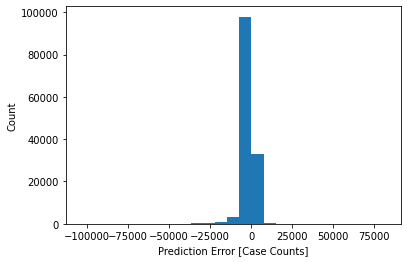

In [ ]:
error = val_predictions_nnmodel8 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

## Red Neuronal de 3 capas, 16 neuronas y función ReLu

In [ ]:
def build_and_compile_model6(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

dnn_model6 = build_and_compile_model6(normalizer)
dnn_model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 17)               35        
 ion)                                                            
                                                                 
 dense_26 (Dense)            (None, 16)                288       
                                                                 
 dense_27 (Dense)            (None, 16)                272       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 884
Trainable params: 849
Non-trainable params: 35
_______________________________________________________

In [ ]:
%%time
history6 = dnn_model6.fit(
    Xtrain2_tf,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
31833/31833 [==============================] - 56s 2ms/step - loss: 3901.0610 - val_loss: 3857.0088
Epoch 2/100
31833/31833 [==============================] - 56s 2ms/step - loss: 3810.2451 - val_loss: 3823.0813
Epoch 3/100
31833/31833 [==============================] - 56s 2ms/step - loss: 3693.3972 - val_loss: 3518.2139
Epoch 4/100
31833/31833 [==============================] - 59s 2ms/step - loss: 3541.8931 - val_loss: 3468.0903
Epoch 5/100
31833/31833 [==============================] - 57s 2ms/step - loss: 3486.7224 - val_loss: 3462.1233
Epoch 6/100
31833/31833 [==============================] - 56s 2ms/step - loss: 3442.8667 - val_loss: 3415.7161
Epoch 7/100
31833/31833 [==============================] - 56s 2ms/step - loss: 3398.1851 - val_loss: 3482.2346
Epoch 8/100
31833/31833 [==============================] - 56s 2ms/step - loss: 3366.6973 - val_loss: 3343.7839
Epoch 9/100
31833/31833 [==============================] - 56s 2ms/step - loss: 3344.3894 - val_loss: 33

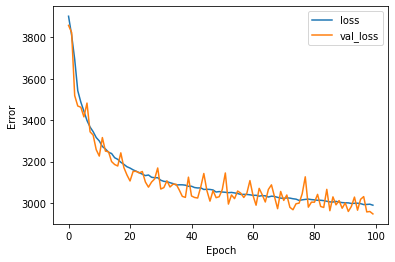

In [ ]:
plot_loss(history6)

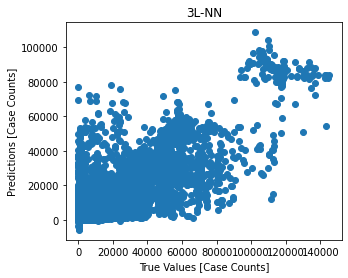

In [ ]:
val_predictions_nnmodel6 = dnn_model6.predict(X_val_states.iloc[:, 1:]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel6)
plt.title('3L-NN')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nnCustom, _ = pearsonr(y_val_states, val_predictions_nnmodel6)
print("Pearson Correlation Coefficient = ", corr_nnCustom) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel6))

Pearson Correlation Coefficient =  0.8477775495306838
Mean Abolsute Error =  1536.0461155690748


In [ ]:
dnn_model6.save('dnn_model6')

INFO:tensorflow:Assets written to: dnn_model6/assets


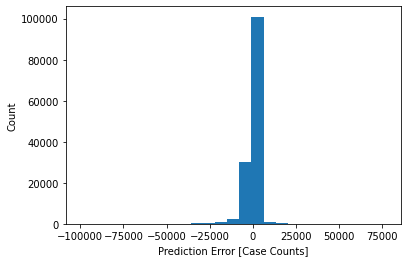

In [ ]:
error = val_predictions_nnmodel6 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

# Red Neuronal de 3 capas, 9 neuronas y función ReLu

In [ ]:
def build_and_compile_model7(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(9, activation='relu'),
      layers.Dense(9, activation='relu'),
      layers.Dense(9, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

dnn_model7 = build_and_compile_model7(normalizer)
dnn_model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 17)               35        
 ion)                                                            
                                                                 
 dense_30 (Dense)            (None, 9)                 162       
                                                                 
 dense_31 (Dense)            (None, 9)                 90        
                                                                 
 dense_32 (Dense)            (None, 9)                 90        
                                                                 
 dense_33 (Dense)            (None, 1)                 10        
                                                                 
Total params: 387
Trainable params: 352
Non-trainable params: 35
_______________________________________________________

In [ ]:
%%time
history7 = dnn_model7.fit(
    Xtrain2_tf,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
31833/31833 [==============================] - 59s 2ms/step - loss: 3903.9307 - val_loss: 3767.9944
Epoch 2/100
31833/31833 [==============================] - 62s 2ms/step - loss: 3810.4631 - val_loss: 3723.9900
Epoch 3/100
31833/31833 [==============================] - 60s 2ms/step - loss: 3772.2854 - val_loss: 3700.1653
Epoch 4/100
31833/31833 [==============================] - 60s 2ms/step - loss: 3745.5432 - val_loss: 3668.3906
Epoch 5/100
31833/31833 [==============================] - 59s 2ms/step - loss: 3730.3423 - val_loss: 3664.6680
Epoch 6/100
31833/31833 [==============================] - 59s 2ms/step - loss: 3718.6033 - val_loss: 3666.3989
Epoch 7/100
31833/31833 [==============================] - 59s 2ms/step - loss: 3692.9248 - val_loss: 3610.3547
Epoch 8/100
31833/31833 [==============================] - 60s 2ms/step - loss: 3558.7681 - val_loss: 3449.1375
Epoch 9/100
31833/31833 [==============================] - 62s 2ms/step - loss: 3459.3223 - val_loss: 34

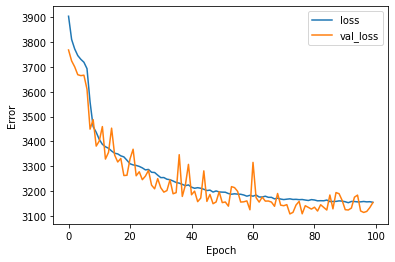

In [ ]:
plot_loss(history7)

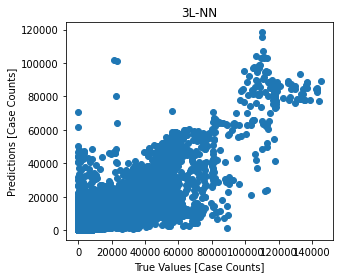

In [ ]:
val_predictions_nnmodel7 = dnn_model7.predict(X_val_states.iloc[:, 1:]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel7)
plt.title('3L-NN')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nnCustom, _ = pearsonr(y_val_states, val_predictions_nnmodel7)
print("Pearson Correlation Coefficient = ", corr_nnCustom) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel7))

Pearson Correlation Coefficient =  0.8550344236043702
Mean Abolsute Error =  1561.40335283319


In [ ]:
dnn_model7.save('dnn_model7')

INFO:tensorflow:Assets written to: dnn_model7/assets


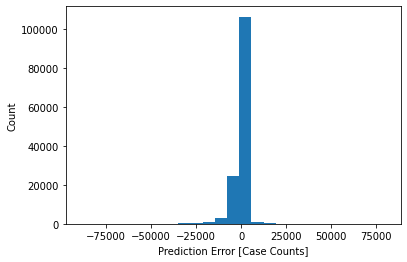

In [ ]:
error = val_predictions_nnmodel7 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

## Red Neuronal de 2 capas, 16 neuronas y función ReLu

In [37]:
def build_and_compile_model9(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

dnn_model9 = build_and_compile_model9(normalizer)
dnn_model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 18)               37        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                304       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 630
Trainable params: 593
Non-trainable params: 37
_________________________________________________________________


In [39]:
%%time
history9 = dnn_model9.fit(
    X_train2,
    y_train2,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
81789/81789 [==============================] - 341s 4ms/step - loss: 1169.7052 - val_loss: 1130.4797
Epoch 2/100
81789/81789 [==============================] - 340s 4ms/step - loss: 1128.4137 - val_loss: 1143.1545
Epoch 3/100
12412/81789 [===>..........................] - ETA: 3:51 - loss: 1119.2083

KeyboardInterrupt: ignored

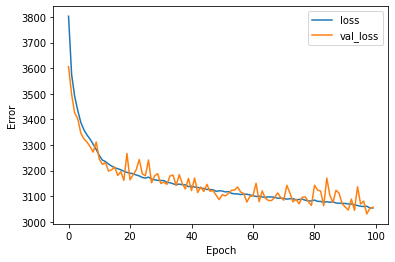

In [ ]:
plot_loss(history9)

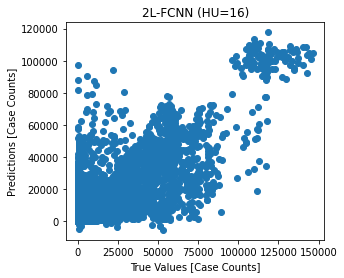

In [ ]:
val_predictions_nnmodel9 = dnn_model9.predict(X_val_states).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_val_states, val_predictions_nnmodel9)
plt.title('2L-FCNN (HU=16)')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nnCustom, _ = pearsonr(y_val_states, val_predictions_nnmodel9)
print("Pearson Correlation Coefficient = ", corr_nnCustom) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_val_states, val_predictions_nnmodel9))

Pearson Correlation Coefficient =  0.8583108981641427
Mean Abolsute Error =  1502.3515293649955


In [ ]:
dnn_model9.save(FOLDERNAME+'/dnn_model9')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS230_FINAL_PROJECT/dnn_model9/assets


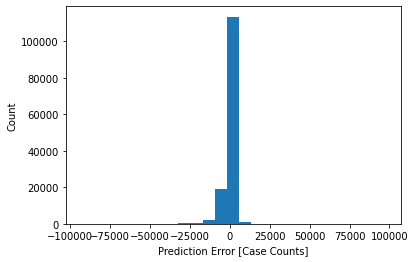

In [ ]:
error = val_predictions_nnmodel9 - y_val_states
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Case Counts]')
_ = plt.ylabel('Count')

## Test Set Performance

In [ ]:
X_test_states

,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,POVALL_2019,POV017_2019
909737,19214.0,19473.0,5217.0,8018.0,13421.0,8037.0,1729.0,1415.0,289.0,16.0,14468,13880,588,4.1,63975,103.5,2227,552
849595,10279.0,9662.0,4846.0,5997.0,5337.0,5799.0,946.0,405.0,62.0,19.0,10009,9565,444,4.4,66861,108.2,1056,302
679844,44918.0,48543.0,23124.0,28939.0,24772.0,5559.0,3618.0,1239.0,179.0,58.0,23558,22008,1550,6.6,46683,90.2,7998,2204
677069,18470.0,19417.0,8665.0,13940.0,12422.0,7507.0,5388.0,576.0,51.0,9.0,9056,8255,801,8.8,39944,77.2,4124,1460
1071048,1273.0,418.0,296.0,243.0,1882.0,843.0,582.0,0.0,0.0,4.0,969,942,27,2.8,41240,72.0,425,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676188,33731.0,39629.0,20471.0,28249.0,34215.0,17619.0,5634.0,1218.0,564.0,28.0,24661,23653,1008,4.1,52902,102.2,9324,2750
850286,35591.0,32981.0,14229.0,16047.0,19825.0,12885.0,4867.0,1058.0,211.0,45.0,17514,16278,1236,7.1,55631,90.0,4947,1482
141930,94806.0,96262.0,32775.0,42436.0,26690.0,20220.0,9462.0,4626.0,657.0,656.0,70434,66898,3536,5.0,73731,128.8,11486,1696
1479488,9874.0,13168.0,4454.0,5178.0,4269.0,3710.0,1360.0,1187.0,148.0,6.0,4644,4475,169,3.6,53085,85.9,1263,432


In [ ]:
new_model = tf.keras.models.load_model(FOLDERNAME+'/dnn_model9')

test_predictions = new_model.predict(X_test_states.iloc[:, 1:]).flatten()

In [ ]:
print('Test Min = ', test_predictions.min())
print('Test Max = ', test_predictions.max())

Test Min =  -6058.7266
Test Max =  111901.82


In [ ]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 17)               35        
 n)                                                              
                                                                 
 dense_23 (Dense)            (None, 16)                288       
                                                                 
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 612
Trainable params: 577
Non-trainable params: 35
_________________________________________________________________


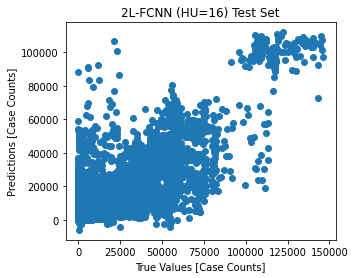

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test_states, test_predictions)
plt.title('2L-FCNN (HU=16) Test Set')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nnCustom, _ = pearsonr(y_test_states, test_predictions)
print("Pearson Correlation Coefficient = ", corr_nnCustom) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_test_states, test_predictions))

Pearson Correlation Coefficient =  0.8559363282813206
Mean Abolsute Error =  1514.0859480979852


# Ejecución con información actualizada

In [ ]:
travel_data_raw_REC = pd.read_csv(FOLDERNAME + "/Trips_by_Distance_Recent.csv", thousands=',')
covid_counts_raw_REC = pd.read_csv(FOLDERNAME + "/us-counties-recent.csv")

In [ ]:
#travel_data_raw.head()
travel_counties_REC = travel_data_raw_REC.loc[travel_data_raw_REC['Level'] == "County"]
travel_counties_final_REC = travel_counties_REC[['Date', 'State Postal Code', 'County Name', 'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500']]
travel_counties_final_REC['County Name'] = travel_counties_final_REC['County Name'].apply(lambda x: x.split(" ")[0])
travel_counties_final_REC = travel_counties_final_REC.rename(columns={"Date": "date", "State Postal Code": "state", "County Name": "county"})
travel_counties_final_REC.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,state,county,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
21061,2021/06/06,WY,Weston,22471.0,4160.0,2601.0,948.0,1558.0,5723.0,2202.0,3930.0,1160.0,166.0,23.0
22762,2021/06/06,AR,Bradley,25022.0,3411.0,4145.0,5901.0,4321.0,3343.0,1793.0,1383.0,690.0,35.0,0.0
22763,2021/06/06,AR,Calhoun,17543.0,2166.0,2168.0,3195.0,3600.0,4277.0,1141.0,530.0,425.0,41.0,0.0
22764,2021/06/06,AR,Carroll,77047.0,14712.0,16029.0,11434.0,13170.0,14712.0,4272.0,1227.0,1323.0,132.0,36.0
22765,2021/06/06,AR,Chicot,31550.0,9483.0,6752.0,4547.0,3929.0,3857.0,1380.0,580.0,957.0,61.0,4.0


In [ ]:
covid_counts_final_REC = covid_counts_raw_REC[['date', 'county', 'state', 'cases']]
covid_counts_final_REC['date'] = covid_counts_final_REC['date'].apply(lambda x: x.replace('-', '/'))
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands": "VI",
}
covid_counts_final_REC['state'] = covid_counts_final_REC['state'].apply(lambda x: us_state_to_abbrev[x])
covid_counts_final_REC.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,county,state,cases
0,2021/10/31,Autauga,AL,10252
1,2021/10/31,Baldwin,AL,37414
2,2021/10/31,Barbour,AL,3601
3,2021/10/31,Bibb,AL,4279
4,2021/10/31,Blount,AL,10406


In [ ]:
final_data_REC = pd.merge(covid_counts_final_REC, travel_counties_final_REC)
final_data_REC.head()

,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2021/10/31,Autauga,AL,10252,168866.0,45986.0,37186.0,15892.0,20362.0,34575.0,7455.0,4763.0,2047.0,530.0,70.0
1,2021/10/31,Baldwin,AL,37414,598580.0,141458.0,143936.0,70339.0,94762.0,97291.0,32808.0,8458.0,5885.0,2821.0,822.0
2,2021/10/31,Barbour,AL,3601,83031.0,19690.0,16577.0,10642.0,16586.0,9782.0,5715.0,2788.0,988.0,241.0,22.0
3,2021/10/31,Bibb,AL,4279,65647.0,11222.0,14243.0,8564.0,13500.0,8686.0,6384.0,1982.0,875.0,175.0,16.0
4,2021/10/31,Blount,AL,10406,159532.0,28123.0,34806.0,19489.0,24448.0,30515.0,14331.0,4532.0,2610.0,601.0,77.0


In [ ]:
final_data_REC = final_data_REC.dropna()
final_data_REC.to_csv(FOLDERNAME+'/final_data_REC.csv')

In [ ]:
print("Number of Total Inputs: ", len(final_data_REC))
# print("Confirmed (number should be the same): ",np.sum(final_data.groupby('county').size().to_list()))
print("Number of Total Counties: " ,len(final_data_REC.groupby('county').size().to_list()))

Number of Total Inputs:  60611
Number of Total Counties:  1614


In [ ]:
final_data_REC = pd.read_csv(FOLDERNAME+'/final_data_REC.csv').iloc[0:, 1:]
# final_data_old = final_data_old.dropna()
final_data_REC

,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,2021/10/31,Autauga,AL,10252,168866.0,45986.0,37186.0,15892.0,20362.0,34575.0,7455.0,4763.0,2047.0,530.0,70.0
1,2021/10/31,Baldwin,AL,37414,598580.0,141458.0,143936.0,70339.0,94762.0,97291.0,32808.0,8458.0,5885.0,2821.0,822.0
2,2021/10/31,Barbour,AL,3601,83031.0,19690.0,16577.0,10642.0,16586.0,9782.0,5715.0,2788.0,988.0,241.0,22.0
3,2021/10/31,Bibb,AL,4279,65647.0,11222.0,14243.0,8564.0,13500.0,8686.0,6384.0,1982.0,875.0,175.0,16.0
4,2021/10/31,Blount,AL,10406,159532.0,28123.0,34806.0,19489.0,24448.0,30515.0,14331.0,4532.0,2610.0,601.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60606,2021/11/20,Sweetwater,WY,8007,165496.0,50928.0,51818.0,16435.0,11470.0,21741.0,4945.0,4130.0,3607.0,369.0,53.0
60607,2021/11/20,Teton,WY,5350,77322.0,16248.0,16690.0,10443.0,14270.0,8954.0,6413.0,2344.0,1167.0,282.0,511.0
60608,2021/11/20,Uinta,WY,4005,72384.0,18461.0,22645.0,9246.0,5205.0,6880.0,2295.0,5264.0,2179.0,136.0,73.0
60609,2021/11/20,Washakie,WY,1822,31476.0,13347.0,8799.0,2423.0,1932.0,2252.0,1443.0,870.0,345.0,51.0,14.0


In [ ]:
final_data_REC.columns

Index(['date', 'county', 'state', 'cases', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500'],
      dtype='object')

In [ ]:
#Quick Check for NA/NaN in data
final_data_REC.isnull().any()

date                       False
county                     False
state                      False
cases                      False
Number of Trips            False
Number of Trips <1         False
Number of Trips 1-3        False
Number of Trips 3-5        False
Number of Trips 5-10       False
Number of Trips 10-25      False
Number of Trips 25-50      False
Number of Trips 50-100     False
Number of Trips 100-250    False
Number of Trips 250-500    False
Number of Trips >=500      False
dtype: bool

In [ ]:
unemployment = pd.read_csv(FOLDERNAME+'/Unemployment.csv')
unemployment = unemployment[unemployment["county"].str.contains(",")==True]
unemployment['county'] = unemployment['county'].apply(lambda x: x.split(" County")[0])
final_unemployment = pd.merge(final_data_REC, unemployment)

poverty = pd.read_csv(FOLDERNAME+'/PovertyEstimates-3.csv')
poverty = poverty[poverty["county"].str.contains("County")==True]
poverty['county'] = poverty['county'].apply(lambda x: x.split(" County")[0])
final_data = pd.merge(final_unemployment, poverty)
final_data['Civilian_labor_force_2020'] = final_data['Civilian_labor_force_2020'].apply(lambda x: int(x.replace(',', '')))
final_data['Employed_2020'] = final_data['Employed_2020'].apply(lambda x: int(x.replace(',', '')))
final_data['Unemployed_2020'] = final_data['Unemployed_2020'].apply(lambda x: int(x.replace(',', '')))
final_data['Median_Household_Income_2019'] = final_data['Median_Household_Income_2019'].apply(lambda x: int(x.replace(',', '')))
final_data['POVALL_2019'] = final_data['POVALL_2019'].apply(lambda x: int(x.replace(',', '')))
final_data['POV017_2019'] = final_data['POV017_2019'].apply(lambda x: int(x.replace(',', '')))

final_data_TEST = final_data.dropna()

final_data_TEST

,date,county,state,cases,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,POVALL_2019,POV017_2019
0,2021/10/31,Autauga,AL,10252,168866.0,45986.0,37186.0,15892.0,20362.0,34575.0,7455.0,4763.0,2047.0,530.0,70.0,25838,24576,1262,4.9,58233,112.5,6723,2040
1,2021/11/01,Autauga,AL,10258,215716.0,62946.0,47674.0,19776.0,24797.0,46771.0,8191.0,3587.0,1460.0,457.0,57.0,25838,24576,1262,4.9,58233,112.5,6723,2040
2,2021/11/02,Autauga,AL,10271,215891.0,61056.0,48944.0,20514.0,25206.0,46577.0,8140.0,3415.0,1549.0,428.0,62.0,25838,24576,1262,4.9,58233,112.5,6723,2040
3,2021/11/03,Autauga,AL,10284,203708.0,54992.0,45616.0,19135.0,22917.0,45517.0,9020.0,4438.0,1588.0,429.0,56.0,25838,24576,1262,4.9,58233,112.5,6723,2040
4,2021/11/04,Autauga,AL,10304,199943.0,53651.0,44051.0,18534.0,24174.0,45238.0,8642.0,3794.0,1356.0,444.0,59.0,25838,24576,1262,4.9,58233,112.5,6723,2040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59514,2021/11/16,Slope,ND,53,1524.0,69.0,161.0,71.0,48.0,483.0,570.0,57.0,63.0,0.0,2.0,391,379,12,3.1,52695,78.2,101,29
59515,2021/11/17,Slope,ND,53,1349.0,82.0,34.0,0.0,96.0,335.0,652.0,57.0,87.0,0.0,6.0,391,379,12,3.1,52695,78.2,101,29
59516,2021/11/18,Slope,ND,54,1344.0,6.0,124.0,0.0,46.0,579.0,525.0,14.0,30.0,17.0,3.0,391,379,12,3.1,52695,78.2,101,29
59517,2021/11/19,Slope,ND,54,1354.0,92.0,253.0,54.0,44.0,558.0,256.0,74.0,19.0,0.0,4.0,391,379,12,3.1,52695,78.2,101,29


In [ ]:
X_recent = final_data_TEST[['Number of Trips 1-3',	'Number of Trips 3-5',	'Number of Trips 5-10',	'Number of Trips 10-25',	'Number of Trips 25-50',	'Number of Trips 50-100',	'Number of Trips 100-250', 'Number of Trips 250-500',	'Number of Trips >=500', 'Civilian_labor_force_2020',	'Employed_2020',	'Unemployed_2020',	'Unemployment_rate_2020',	'Median_Household_Income_2019',	'Med_HH_Income_Percent_of_State_Total_2019',	'POVALL_2019',	'POV017_2019']]
y_recent = final_data_TEST['cases']

In [ ]:
X_recent

,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,POVALL_2019,POV017_2019
0,37186.0,15892.0,20362.0,34575.0,7455.0,4763.0,2047.0,530.0,70.0,25838,24576,1262,4.9,58233,112.5,6723,2040
1,47674.0,19776.0,24797.0,46771.0,8191.0,3587.0,1460.0,457.0,57.0,25838,24576,1262,4.9,58233,112.5,6723,2040
2,48944.0,20514.0,25206.0,46577.0,8140.0,3415.0,1549.0,428.0,62.0,25838,24576,1262,4.9,58233,112.5,6723,2040
3,45616.0,19135.0,22917.0,45517.0,9020.0,4438.0,1588.0,429.0,56.0,25838,24576,1262,4.9,58233,112.5,6723,2040
4,44051.0,18534.0,24174.0,45238.0,8642.0,3794.0,1356.0,444.0,59.0,25838,24576,1262,4.9,58233,112.5,6723,2040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59514,161.0,71.0,48.0,483.0,570.0,57.0,63.0,0.0,2.0,391,379,12,3.1,52695,78.2,101,29
59515,34.0,0.0,96.0,335.0,652.0,57.0,87.0,0.0,6.0,391,379,12,3.1,52695,78.2,101,29
59516,124.0,0.0,46.0,579.0,525.0,14.0,30.0,17.0,3.0,391,379,12,3.1,52695,78.2,101,29
59517,253.0,54.0,44.0,558.0,256.0,74.0,19.0,0.0,4.0,391,379,12,3.1,52695,78.2,101,29


In [ ]:
test_predictions = new_model.predict(X_recent).flatten()

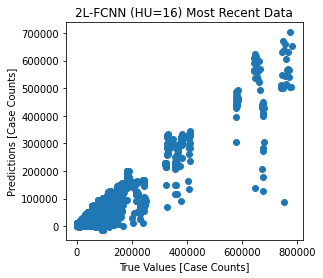

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_recent, test_predictions)
plt.title('2L-FCNN (HU=16) Most Recent Data')
plt.xlabel('True Values [Case Counts]')
plt.ylabel('Predictions [Case Counts]')
plt.show()

In [ ]:
corr_nnCustom, _ = pearsonr(y_recent, test_predictions)
print("Pearson Correlation Coefficient = ", corr_nnCustom) # Note: r = 0.5 - 1.0 means strong positive association
print("Mean Abolsute Error = ", mean_absolute_error(y_recent, test_predictions))

Pearson Correlation Coefficient =  0.9572112649478409
Mean Abolsute Error =  5800.219338747015
